# NAIVE-BAYES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import io
from google.colab import drive 

from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_data = pd.read_csv('gdrive/My Drive/BERT/train.txt', header =None, sep =';', names = ['text','emotion'], encoding='utf-8')
test_data = pd.read_csv('gdrive/My Drive/BERT/test.txt',header =None, sep =';', names = ['text','emotion'], encoding='utf-8')
val_data = pd.read_csv('gdrive/My Drive/BERT/val.txt', header =None, sep =';', names = ['text','emotion'], encoding='utf-8')

In [ ]:
train_data.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     16000 non-null  object
 1   emotion  16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [ ]:
train_data.shape

(16000, 2)

In [ ]:
train_data['emotion'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: emotion, dtype: int64

In [ ]:
ros = RandomOverSampler(random_state=42)
train_x, train_y = ros.fit_resample(np.array(train_data['text']).reshape(-1, 1), np.array(train_data['emotion']).reshape(-1, 1));
train = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['text', 'emotion']);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
ohe = preprocessing.OneHotEncoder()
#y_train= ohe.fit_transform(np.array(train['emotion']).reshape(-1, 1)).toarray()
#y_test= ohe.fit_transform(np.array(test_data['emotion']).reshape(-1, 1)).toarray()
#y_val= ohe.fit_transform(np.array(val_data['emotion']).reshape(-1, 1)).toarray()

y_train=np.array(train_data['emotion'])
y_test=np.array(test_data['emotion'])
y_val=np.array(val_data['emotion'])

In [ ]:
# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Train the model using the training data
model.fit(train_data.text, train_data.emotion)
# Predict the categories of the test data
y_pred = model.predict(test_data.text)

In [ ]:
y_test

array(['sadness', 'sadness', 'sadness', ..., 'joy', 'joy', 'fear'],
      dtype=object)

In [ ]:
conf_matrix=confusion_matrix(y_pred,y_test)

In [ ]:
classification_report(y_pred,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n       anger       0.16      0.96      0.28        47\n        fear       0.18      1.00      0.31        41\n         joy       0.99      0.60      0.75      1135\n        love       0.03      1.00      0.05         4\n     sadness       0.90      0.67      0.77       773\n    surprise       0.00      0.00      0.00         0\n\n    accuracy                           0.65      2000\n   macro avg       0.38      0.71      0.36      2000\nweighted avg       0.91      0.65      0.74      2000\n'

              precision    recall  f1-score   support

       anger       0.16      0.96      0.28        47
        fear       0.18      1.00      0.31        41
         joy       0.99      0.60      0.75      1135
        love       0.03      1.00      0.05         4
     sadness       0.90      0.67      0.77       773
    surprise       0.00      0.00      0.00         0

    accuracy                           0.65      2000
   macro avg       0.38      0.71      0.36      2000
weighted avg       0.91      0.65      0.74      2000





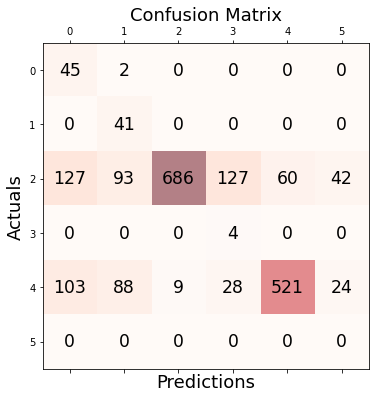

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(conf_matrix, cmap=plt.cm.Reds, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()